## 2017 Kaggle ML & DS Survey

### 2017 캐글러를 대상으로 한 설문조사 분석 

- Kaggle은 처음으로 데이터 과학 및 기계 학습 상태에 대한 포괄적 인 견해를 확립하기 위해 업계 전반에 걸친 설문 조사를 실시했습니다. 
- 16,000건이 넘는 응답을 받았고 누가 데이터를 다루고 있는지, 산업 전반의 기계 학습에서 어떤 일이 일어나고 있는지, 그리고 새로운 데이터 과학자가 어떻게 현장에 침입 할 수 있는지에 대해 많은 정보를 얻었습니다.

### 데이터 파일
#### 5개의 데이터 파일을 제공

- `schema.csv` : 설문 스키마가 있는 CSV 파일입니다. 이 스키마에는 `multipleChoiceResponses.csv` 및 `freeformResponses.csv`의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
- `multipleChoiceResponses.csv` : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- `freeformResponses.csv` : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
- `conversionRates.csv` : R 패키지 quantmod에서 2017년 9월 14일에 액세스 한 통화 변환율 (USD)
- `RespondentTypeREADME.txt` : `schema.csv` 파일의 Asked 열에 응답을 디코딩하는 스키마입니다.

### 방법론 

- 설문 기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171개 국가 및 지역에서 16,716명의 응답자
- 특정 국가 또는 지역에서 응답자가 50명 미만인 경우 익명을 위해 그룹을 '기타' 그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당하는 통화에 기준으로 하여 작성하도록 함
- 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보이는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정

In [7]:
%matplotlib inline

# Import the standart Python Scientiifc Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
# 설문지/질문 csv file read
question = pd.read_csv('Data/schema.csv')
question.shape

(290, 3)

In [34]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [14]:
# 객관식 문제 응답지 csv file read
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 42: invalid continuation byte

In [15]:
mcq.shape

(16716, 228)

In [16]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [17]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


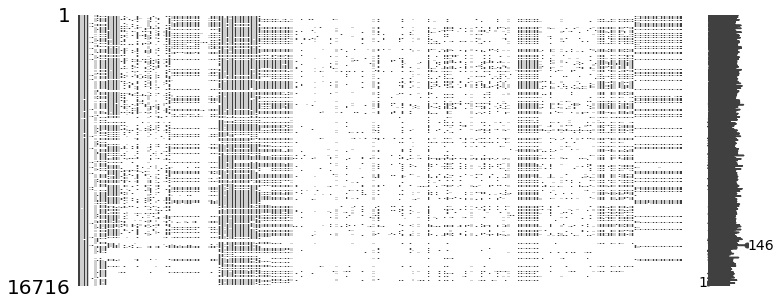

In [21]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.

import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 16,716명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

## 설문 통계 

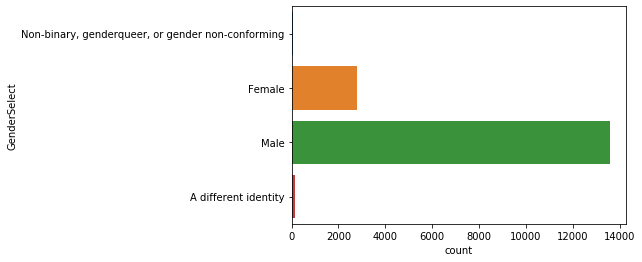

In [22]:
sns.countplot(y='GenderSelect', data=mcq)

- 여성 보다 남성의 응답 비율이 높다. 

####  국가별 응답 수 

In [32]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)

# Country 컬럼은 인덱스로 지정한다. 
con_df['국가'] = con_df.index
con_df.columns = ['응답수', '국가']

# index 컬럼을 삭제, 순위를 알기 위해 reset_index()를 한다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada
